# Step 1. Open the data file and study the general information.

In [147]:
import pandas as pd
data = pd.read_csv('C:/practicum/3. Exploratory Data Analysis (EDA)/6. project/vehicles_us.csv')

In [148]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [150]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

## Conclusion:

1. There are significant amount of **missing data** in the *model_year, cylinders, odometer, paint_color* and *is_4wd* columns.
2. It is necessary to convert some values of the **float** type into **int** type.

# Step 2. Data preprocessing

In [151]:
# explore the model_year column
print(data['model_year'].min())
print(data['model_year'].max())
print(data['model_year'].mean())
print(data['model_year'].median())
# the mean and median doesn't differenciate much from each other, so either can be choosen to fill in the missing values

1908.0
2019.0
2009.75046966977
2011.0


In [152]:
# replace the missing values in model_year with the median value
data['model_year'] = data['model_year'].fillna(data['model_year'].median())
# use median to avoid influence of outliers (not very significant in this case though)

In [153]:
# explore the cylinders column
print(data['cylinders'].min())
print(data['cylinders'].max())
print(data['cylinders'].mean())
print(data['cylinders'].median())
# the mean and median doesn't differenciate much from each other, so either can be choosen to fill in the missing values

3.0
12.0
6.125235058899817
6.0


In [154]:
# replace the missing values in cylinders with the median value
data['cylinders'] = data['cylinders'].fillna(data['cylinders'].median())
# use median to avoid influence of outliers (not very significant in this case though)

In [155]:
# explore the odometer column
print(data['odometer'].min())
print(data['odometer'].max())
print(data['odometer'].mean())
print(data['odometer'].median())
# the mean and median doesn't differenciate much from each other, so either can be choosen to fill in the missing values

0.0
990000.0
115553.4617376756
113000.0


In [156]:
# replace the missing values in odometer with the median value
data['odometer'] = data['odometer'].fillna(data['odometer'].median())
# use median to avoid influence of outliers (not very significant in this case though)

In [157]:
# explore the is_4wd column
print(data['is_4wd'].min())
print(data['is_4wd'].max())
print(data['is_4wd'].mean())
print(data['is_4wd'].median())
# the result shows that the missing values are probably false boolean values, while the 1s are true values

1.0
1.0
1.0
1.0


In [158]:
# replace the missing values in is_4wd with 0
data['is_4wd'] = data['is_4wd'].fillna(0)

In [159]:
# replace the missing values in paint_color with other
data['paint_color'] = data['paint_color'].fillna('other')

In [160]:
# change the model_year, cylinders, odometer and is_4wd into int64 type 
data['model_year'] = data['model_year'].astype('int64')
data['cylinders'] = data['cylinders'].astype('int64')
data['odometer'] = data['odometer'].astype('int64')
data['is_4wd'] = data['is_4wd'].astype('int64')

In [161]:
# check duplicates 
print(data['model'].unique())
print(data['condition'].unique())
print(data['fuel'].unique())
print(data['transmission'].unique())
print(data['type'].unique())
print(data['date_posted'].unique())
print(data['paint_color'].unique())

['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

In [162]:
# it seems there is no duplicate resulting from upper or lower case of strings, but drop duplicates anyway
data.drop_duplicates()
data.duplicated().sum()

0

In [163]:
# check the information now
data.info()
# The missing data of model_year, cylinders, odometer and paint_color might result from unclear hand-writings, unwilliness of the car owner
# to fill in this information, etc.
# The missing values in is_4wd are actually false boolean values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  int64 
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 5.1+ MB


## Conclusion:

1. The missing numerical values in columns **(model_year, cylinders, odometer)** have been replaced by the **median** value of the rest values in that column.
2. The missing values in the **is_4wd** column have been replaced by **0** as the **false boolean value**.
3. All the numeric values were converted into **int64** type for convinience.
4. The missing values in **paint_color** were filled in with **other**.
5. **Duplicates** were dropped.

# Step 3. Make calculations and add them to the table

In [164]:
# convert the date_posted column to date time 
data['date_posted'] = pd.to_datetime(data['date_posted'], format = '%Y-%m-%d')

In [165]:
# add a new column of weekday
data['weekday'] = pd.DatetimeIndex(data['date_posted']).weekday
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,other,0,2019-03-22,9,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1


In [166]:
# add a new column of year
data['year'] = pd.DatetimeIndex(data['date_posted']).year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,2018
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,other,0,2019-03-22,9,4,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019


In [167]:
# add a new column of month
data['month'] = pd.DatetimeIndex(data['date_posted']).month
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,year,month
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,2018,6
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,other,0,2019-03-22,9,4,2019,3
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4


In [168]:
# add a new column of vehicle_age
data['vehicle_age'] = data['year'] - data['model_year']
data['vehicle_age'].unique()

array([  7,   6,  16,   2,   4,   3,  11,   1,  10,   5,   8,   0,  15,
        14,   9,  13,  17,  12,  53,  24,  18,  19,  26,  22,  38,  20,
        23,  44,  21,  25,  33,  42,  31,  43,  29,  28,  46,  52,  49,
        30,  40,  54,  39,  50,  27,  32,  55,  37,  56,  34,  45,  41,
        51,  63,  47,  48,  36,  35,  65,  57,  71,  58,  59, 110,  82,
        69,  60,  89], dtype=int64)

In [169]:
# when the vehicle_age = 0, there will be problem trying to devide the odometer by this age
# I decide to calculate the average mileage by dividing odometer by 1 when the car is no more than 1 year old, 
# so the 0 values are to be replaced by 1
data['vehicle_age'] = data['vehicle_age'].replace(0, 1)
data['vehicle_age'].unique()

array([  7,   6,  16,   2,   4,   3,  11,   1,  10,   5,   8,  15,  14,
         9,  13,  17,  12,  53,  24,  18,  19,  26,  22,  38,  20,  23,
        44,  21,  25,  33,  42,  31,  43,  29,  28,  46,  52,  49,  30,
        40,  54,  39,  50,  27,  32,  55,  37,  56,  34,  45,  41,  51,
        63,  47,  48,  36,  35,  65,  57,  71,  58,  59, 110,  82,  69,
        60,  89], dtype=int64)

In [170]:
# add a new column of average_mileage 
data['average_mileage'] = (data['odometer'] / data['vehicle_age'])
data.isna().sum()
# it seems there is no line missing in the average_mileage

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
weekday            0
year               0
month              0
vehicle_age        0
average_mileage    0
dtype: int64

In [171]:
# round the average_mileage values to integers
data['average_mileage'] = data['average_mileage'].astype('int64')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,year,month,vehicle_age,average_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,2018,6,7,20714
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10,7,12672
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2,6,18333
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,other,0,2019-03-22,9,4,2019,3,16,7062
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4,2,40451


In [172]:
# replace the values in condition column with appropriate integers
data['condition'] = data['condition'].replace({'new':5, 'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0})
data.info()
# it seems there is no missing value in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  int64         
 4   cylinders        51525 non-null  int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  int64         
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  int64         
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  weekday          51525 non-null  int64         
 14  year             51525 non-null  int64

In [173]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,year,month,vehicle_age,average_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,2018,6,7,20714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10,7,12672
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2,6,18333
3,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,other,0,2019-03-22,9,4,2019,3,16,7062
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4,2,40451


## Conclusion:

1. **Day of the week, month, and year the ad was placed** were calculated.
2. The **age** of vehicle was calculated.
3. Before calculating the average mileage of vehicles, I checked the unique values of the ages and found some are 0. In that case, I *converted these 0 into 1* to calculate the average mileage of those vehicles that are newer than 1 year.
4. The **average mileage** values were converted into **int64** for convienience.

# Step 4. Carry out exploratory data analysis

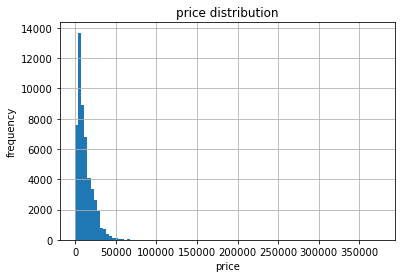

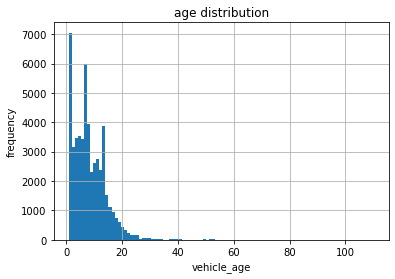

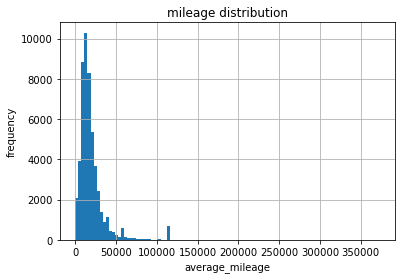

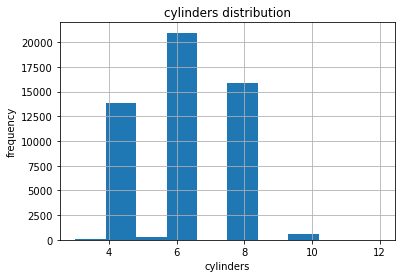

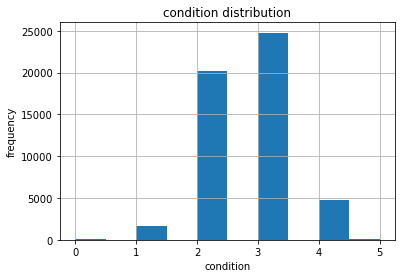

In [174]:
import matplotlib.pyplot as plt
# use histograms to study the price, vehicle_age, average_mileage, cylinders and condition columns
data['price'].hist(bins = 100)
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()
data['vehicle_age'].hist(bins = 100)
plt.title('age distribution')
plt.xlabel('vehicle_age')
plt.ylabel('frequency')
plt.show()
data['average_mileage'].hist(bins = 100)
plt.title('mileage distribution')
plt.xlabel('average_mileage')
plt.ylabel('frequency')
plt.show()
data['cylinders'].hist()
plt.title('cylinders distribution')
plt.xlabel('cylinders')
plt.ylabel('frequency')
plt.show()
data['condition'].hist()
plt.title('condition distribution')
plt.xlabel('condition')
plt.ylabel('frequency')
plt.show()

**Descrption:**

*It seems that in the cases of price, vehicle_age and average_mileage, large outliers expand the vertical axis to 
a very large content which serious influenced the readability of these histograms.*

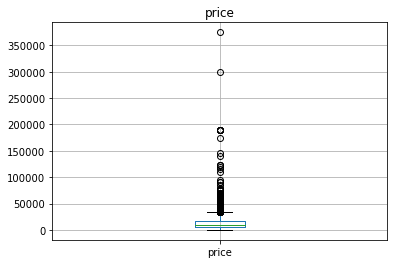

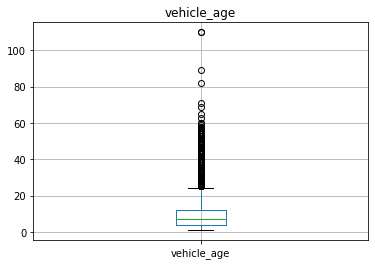

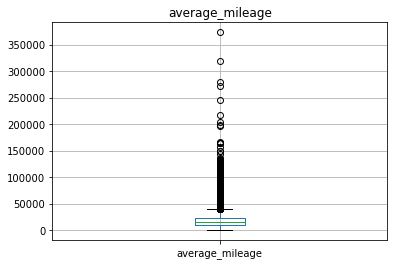

In [175]:
# visualize the upper limits of outliers in price, vehicle_age and average_mileage columns in boxplot
data.boxplot('price')
plt.title('price')
plt.show()
data.boxplot('vehicle_age')
plt.title('vehicle_age')
plt.show()
data.boxplot('average_mileage')
plt.title('average_mileage')
plt.show()

**Description:**

1. For vehcle price, those above somewhere from 3000 to 4000 are outliers.
2. For vehcle age, those above somewhere near 25  are outliers.
3. For mileage, those above somewhere near 40000 are outliers.

*The precise value of upper limits need to be calculated further.*

In [176]:
# numerical description of price
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [177]:
# numerical description of vehicle_age
data['vehicle_age'].describe()

count    51525.000000
mean         8.510529
std          6.025251
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

In [178]:
# numerical description of average_mileage
data['average_mileage'].describe()

count     51525.000000
mean      19129.225172
std       16864.198605
min           0.000000
25%       10360.000000
50%       15161.000000
75%       22221.000000
max      373200.000000
Name: average_mileage, dtype: float64

In [179]:
# define a function to calculate the lower and upper range of the datasets
import numpy as np
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [180]:
outlier_treatment(data['price'])

(-12758.5, 34597.5)

In [181]:
outlier_treatment(data['vehicle_age'])

(-8.0, 24.0)

In [182]:
outlier_treatment(data['average_mileage'])

(-7431.5, 40012.5)

In [183]:
# set the upper_limit values according to the above results
upper_limit_1 = 35000
upper_limit_2 = 24
upper_limit_3 = 40000

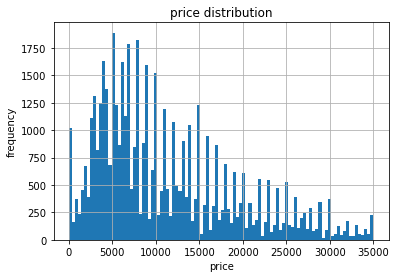

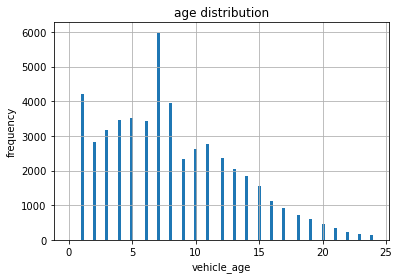

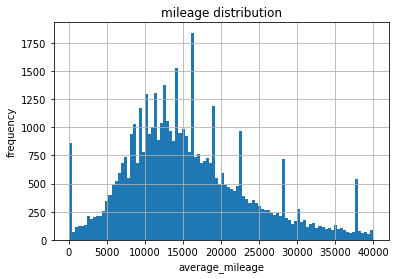

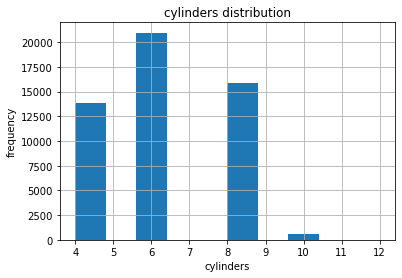

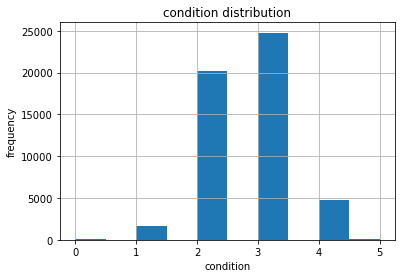

In [184]:
# use new histograms with upper limits to study the price, vehicle_age, average_mileage, cylinders and condition columns
data['price'].hist(bins = 100, range = (0, upper_limit_1))
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()
data['vehicle_age'].hist(bins = 100, range = (0, upper_limit_2))
plt.title('age distribution')
plt.xlabel('vehicle_age')
plt.ylabel('frequency')
plt.show()
data['average_mileage'].hist(bins = 100, range = (0, upper_limit_3))
plt.title('mileage distribution')
plt.xlabel('average_mileage')
plt.ylabel('frequency')
plt.show()
# it is also unlikely that cylinders have 3 or 5 wheels in reality
data.query('cylinders != 3 and cylinders != 5')['cylinders'].hist()
plt.title('cylinders distribution')
plt.xlabel('cylinders')
plt.ylabel('frequency')
plt.show()
data['condition'].hist()
plt.title('condition distribution')
plt.xlabel('condition')
plt.ylabel('frequency')
plt.show()

**Description:**

1. Most vehicles' prices lie in the range from 0 to 20000, with the peak value (highest frequency) at around 5000. 
2. Most vehicles' ages lie in the range from 0 to 15, with the peak value (highest frequency) at 7. 
3. Most vehicles' mileages lie in the range from 0 to 15, with the peak value (highest frequency) at 7. 
4. Most vehicles have 6 wheels.
5. Most vehicles are of the good(2) or excellent(3) conditions.

In [185]:
# use histogram to study the days advertisements were displayed
# find low and upper limits first
outlier_treatment(data['days_listed'])

(-32.0, 104.0)

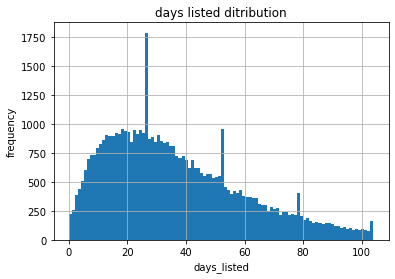

In [186]:
# creat histogram based on the limits obtained above
data['days_listed'].hist(bins = 100, range = (0, 104))
plt.title('days listed ditribution')
plt.xlabel('days_listed')
plt.ylabel('frequency')
plt.show()

**Description:**

We can see that most of the ads were listed from 0 to 60 days, with the average of 40 days and the peak value (highest frequency) at around 25 days.

*The ads are removed quickly when they are listed for less than 10 days, and listed for an abnormal long time when the period exceeds 100 days.*

In [187]:
# calculate the mean and median of days_listed
data['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

In [188]:
# analyze the number of ads and the average price for each type of vehicle
num_ads_type = data.groupby('type')['price'].count()
num_ads_type.sort_values()

type
bus               24
offroad          214
other            256
convertible      446
van              633
hatchback       1047
mini-van        1161
wagon           1541
coupe           2303
pickup          6988
sedan          12154
truck          12353
SUV            12405
Name: price, dtype: int64

In [189]:
avg_price_type = data.groupby('type')['price'].mean()
avg_price_type = avg_price_type.astype('int64')
avg_price_type.sort_values()

type
hatchback       6868
sedan           6965
mini-van        8193
wagon           9088
van            10546
other          10989
SUV            11149
offroad        14292
coupe          14353
convertible    14575
pickup         16057
truck          16734
bus            17135
Name: price, dtype: int64

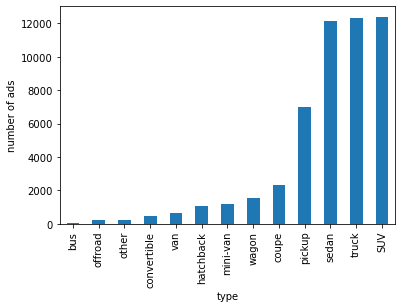

In [190]:
# plot a graph showing the dependence of the number of ads on the vehicle type
num_ads_type.sort_values().plot(kind = 'bar')
plt.ylabel('number of ads')
plt.show()

**Description:**

 We can see that the SUV and truck types have the largest number of ads, while the bus type has the lowest number of ads.

In [191]:
# choose the 2 types with the largest number of ad: truck and SUV
truck_price = data.loc[data['type'] == 'truck',['vehicle_age','average_mileage','condition',
                                                'transmission','paint_color', 'price']]
SUV_price = data.loc[data['type'] == 'SUV',['vehicle_age','average_mileage','condition',
                                                'transmission','paint_color', 'price']]

In [192]:
truck_price.head()

,vehicle_age,average_mileage,condition,transmission,paint_color,price
22,15,12000,4,automatic,red,7500
39,10,23400,2,automatic,black,8000
50,12,5808,3,automatic,custom,6200
53,7,15981,3,automatic,red,10400
60,14,10428,2,automatic,grey,13000


In [193]:
SUV_price.head()

,vehicle_age,average_mileage,condition,transmission,paint_color,price
0,7,20714,2,automatic,other,9400
7,6,18245,3,automatic,black,15990
8,6,17362,3,automatic,other,11500
9,11,13381,3,automatic,blue,9200
14,10,13228,3,automatic,black,12990


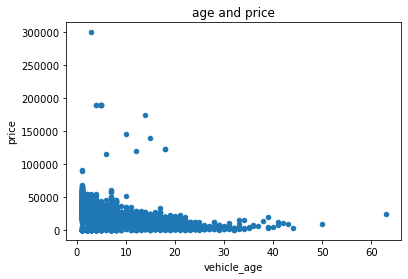

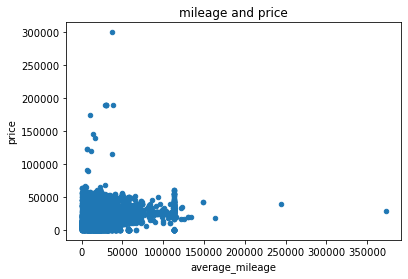

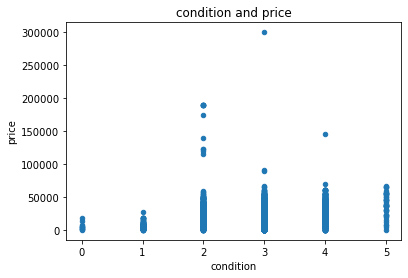

In [194]:
# study the price of truck now
# start with the numerical values
# price and age
truck_price.plot(x = 'vehicle_age', y = 'price', kind = 'scatter')
plt.title('age and price')
plt.show()
# price and mileage 
truck_price.plot(x = 'average_mileage', y = 'price', kind = 'scatter')
plt.title('mileage and price')
plt.show()
# price and condition 
truck_price.plot(x = 'condition', y = 'price', kind = 'scatter')
plt.title('condition and price')
plt.show()


**Description:**

We see from the scatter plots that the age of vehicles and the price are negatively related, the condition of vehicles and the price are positively related. Combining with the correlation data, we see more clear that the mileage of vehicles and the price are positively related.

In [195]:
# find the correlations 
print('corr(age, price):',truck_price['vehicle_age'].corr(truck_price['price']))
print('corr(mileage, price):',truck_price['average_mileage'].corr(truck_price['price']))
print('corr(condition, price):',truck_price['condition'].corr(truck_price['price']))

corr(age, price): -0.5459470899728159
corr(mileage, price): 0.27733979584108015
corr(condition, price): 0.30644241464782224


In [196]:
# find the number of ads of each catergorical values
truck_price.groupby('transmission').count()

,vehicle_age,average_mileage,condition,paint_color,price
transmission,,,,,
automatic,11703,11703,11703,11703,11703
manual,444,444,444,444,444
other,206,206,206,206,206


In [197]:
truck_price.groupby('paint_color').count()

,vehicle_age,average_mileage,condition,transmission,price
paint_color,,,,,
black,1581,1581,1581,1581,1581
blue,881,881,881,881,881
brown,253,253,253,253,253
custom,316,316,316,316,316
green,278,278,278,278,278
grey,960,960,960,960,960
orange,48,48,48,48,48
other,2135,2135,2135,2135,2135
purple,16,16,16,16,16


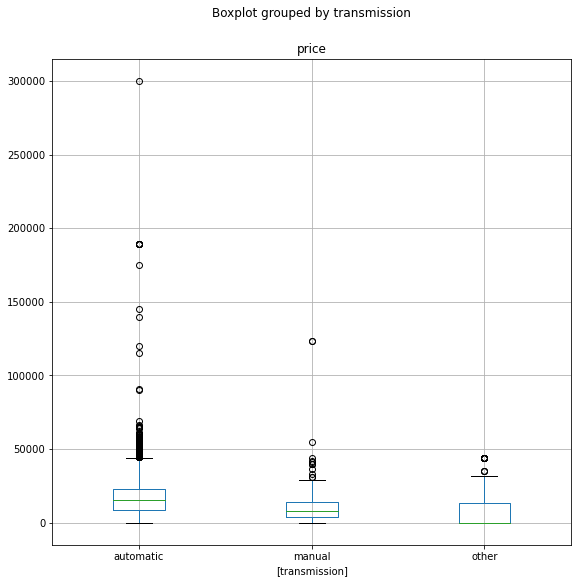

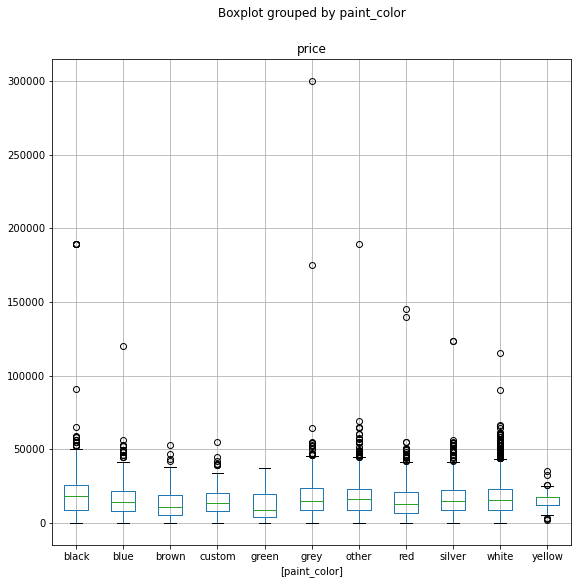

In [198]:
# catergorical values
# price and transmission type
truck_price.boxplot(column = ['price'], by = ['transmission'], figsize = (9, 9))
plt.show()
# price and color(except orange and purple since they have fewer than 50 ads, so it's invalid to plot boxplot on them)
truck_price_filted = truck_price.drop(truck_price[(truck_price['paint_color'] == 'orange') | 
                                       (truck_price['paint_color'] == 'purple')].index, axis = 0)
truck_price_filted.boxplot(column = ['price'], by = ['paint_color'], figsize = (9, 9))
plt.show()

**Description:**

1. In terms of transmissions, the automatic has the highest average price while the 'other' type has the lowest average price.

2. In terms of colors, for truck, the black, other, white and grey seem to have the highest average prices while the green has the lowest average price.

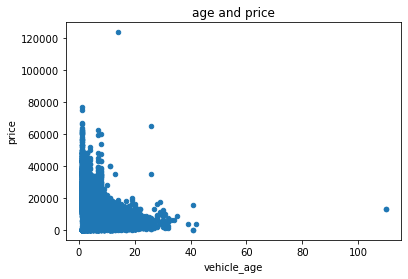

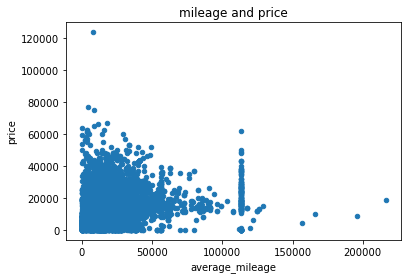

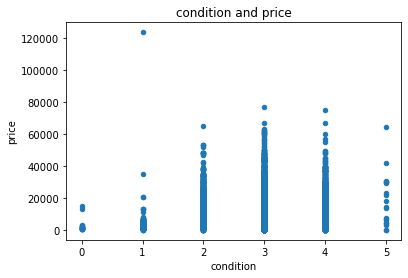

In [199]:
# study the price of SUV now
# start with the numerical values
# price and age
SUV_price.plot(x = 'vehicle_age', y = 'price', kind = 'scatter')
plt.title('age and price')
plt.show()
# price and mileage 
SUV_price.plot(x = 'average_mileage', y = 'price', kind = 'scatter')
plt.title('mileage and price')
plt.show()
# price and condition 
SUV_price.plot(x = 'condition', y = 'price', kind = 'scatter')
plt.title('condition and price')
plt.show()


**Description:**

We see from the scatter plots that the age of vehicles and the price are negatively related, the condition of vehicles and the price are positively related. Combining with the correlation data, we see more clear that the mileage of vehicles and the price are positively related.

In [200]:
# find the correlations 
print('corr(age, price):',SUV_price['vehicle_age'].corr(SUV_price['price']))
print('corr(mileage, price):',SUV_price['average_mileage'].corr(SUV_price['price']))
print('corr(condition, price):',SUV_price['condition'].corr(SUV_price['price']))

corr(age, price): -0.5337541457567972
corr(mileage, price): 0.2561846486408998
corr(condition, price): 0.26755266658608345


In [201]:
# find the number of ads of each catergorical values
SUV_price.groupby('transmission').count()

,vehicle_age,average_mileage,condition,paint_color,price
transmission,,,,,
automatic,11735,11735,11735,11735,11735
manual,510,510,510,510,510
other,160,160,160,160,160


In [202]:
SUV_price.groupby('paint_color').count()

,vehicle_age,average_mileage,condition,transmission,price
paint_color,,,,,
black,2220,2220,2220,2220,2220
blue,1055,1055,1055,1055,1055
brown,369,369,369,369,369
custom,308,308,308,308,308
green,436,436,436,436,436
grey,1183,1183,1183,1183,1183
orange,84,84,84,84,84
other,2236,2236,2236,2236,2236
purple,39,39,39,39,39


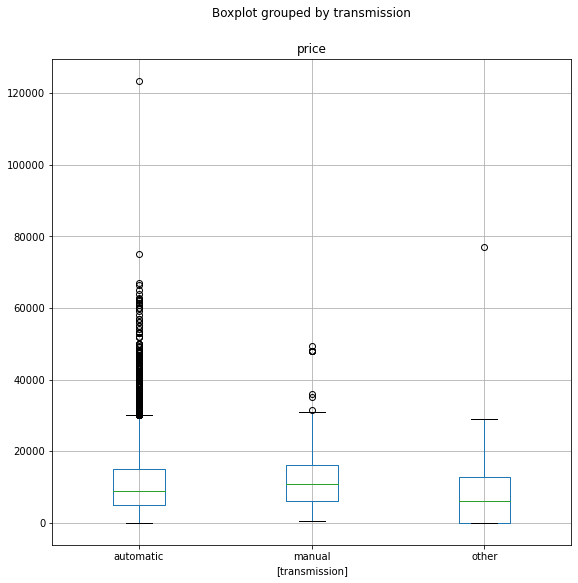

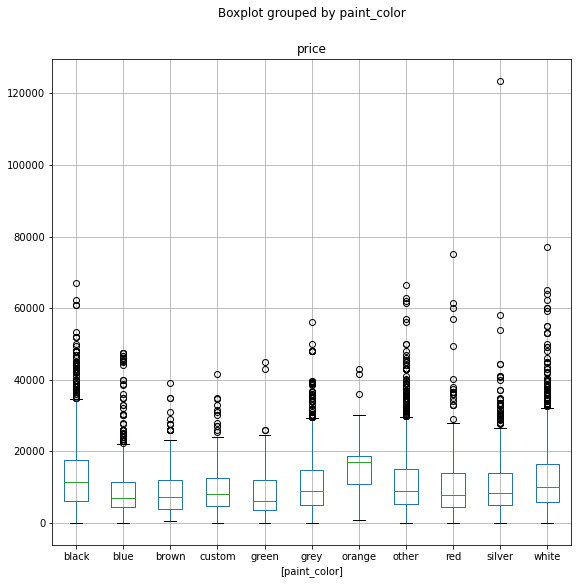

In [203]:
# catergorical values
# price and transmission tyoe
SUV_price.boxplot(column = ['price'], by = ['transmission'], figsize = (9, 9))
plt.show()
# price and color(except yellow and purple since they have fewer than 50 ads, so it's invalid to plot boxplot on them)
SUV_price_filted = SUV_price.drop(SUV_price[(SUV_price['paint_color'] == 'purple') | 
                                       (SUV_price['paint_color'] == 'yellow')].index, axis = 0)
SUV_price_filted.boxplot(column = ['price'], by = ['paint_color'], figsize = (9, 9))
plt.show()

**Description:**

1. In terms of transmissions, the manual has the highest average price while the other has the lowest average price. 

2. In terms of colors, the black and orange seem to have the highest average prices while the green has the lowest average price.

## Conclusion:

1. With the help of boxplot and a newly defined function, I *got histograms which excluded upper outliers*. However, for one histogram without outliers ('cylinders'), I also removed the 3 and 5 values as it is unlikely that vehicles have odd number of wheels.
2. From the histograms, we can see that most **vehicles' prices** lie in the *range from 0 to 20000*, with the *peak value (highest frequency)* at *around 5000*. Most **vehicle's ages** lie in the *range from 0 to 15*, with the *peak value (highest frequency)* at *7*. Most **vehicle's mileages** lie in the *range from 0 to 15*, with the *peak value (highest frequency)* at *7*. Most vehicles have **6 wheels** and are of the **good(2) or excellent(3) conditions**.
3. **Days listed** are presented in histogram and its mean and median are calculated. We can see that most of the ads were listed from **0 to 60 days**, with the *average of 40 days* and the *peak value (highest frequency)* at *around 25  days*. 
4. Using a bar chart to show the **dependence of the number of ads on the vehicle type**. We can see that the **SUV and truck** types have the *largest number of ads*, while the **bus** type has the *lowest number of ads*.
5. Studying the factors which influence **the price of the truck and SUV types**. 
Starting with the numerical factors, we see from the scatter plots that **the age of vehicles** and **the price** are *negatively related*, **the condition of vehicles** and **the price** are *positively related*. Combining with the **correlation data**, we see more clear that **the mileage of vehicles** and **the price** are *positively related*.
Studying the catergorical factors with boxplots. First we have to drop those with less than 50 ads. Then we can see that in terms of **transmissions**, for **truck**, the **automatic** has the *highest average price* while the **other** has the *lowest average price*; for **SUV**, the **manual** has the *highest average price* while the **other** has the *lowest average price*. In terms of **colors**, for **truck**, the **black, other, white and grey** seem to have the *highest average prices* while the **green** has the *lowest average price*; for **SUV**, the **black and orange** seem to have the *highest average prices* while the **green** has the *lowest average price*.

# Step 5. Overall conclusion

The following things have been done in this project:
1. Data was obtained from the original file.
2. Missing values and data types were checked. Then the missing values were filled with proper values and some data types have been changed based on the properties of the variables. 
3. Some variables have been calculated and transfered into proper data types for further analysis.
4. Exploratory data analysis was first carried out on the overall dataset (the data visualization diagrams were adjusted to filter out the outliers). Then took two types of vehicles with the most ads as example, the influence of different factors on the price of the vehicle was studied.